<a href="https://colab.research.google.com/github/EddieOrmseth/MAT-421/blob/main/Module%20B/Part%201/ModuleB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Interpolation Problem Statement: interpolation is the idea of taking a discrete set of points and approximating the values between them, under the assumption that the discrete points are defined by some function.

Below is an example of some raw data that will be used in further examples

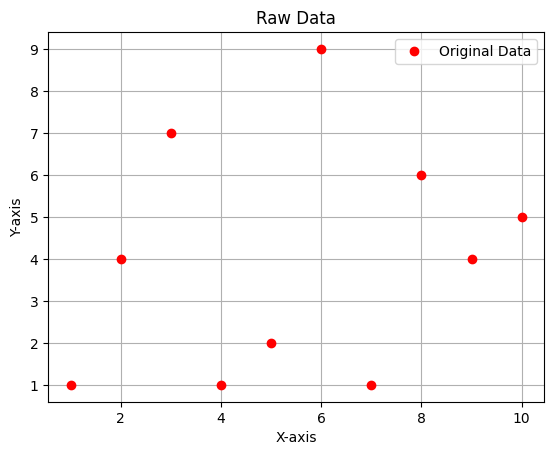

In [1]:
import matplotlib.pyplot as plot

x = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ]
y = [ 1, 4, 7, 1, 2, 9, 1, 6, 4, 5 ]

plot.plot(x, y, marker='o', linestyle='None', color='r', label='Original Data')
plot.title("Raw Data")
plot.xlabel("X-axis")
plot.ylabel("Y-axis")
plot.legend()
plot.grid()
plot.show()


Linear Interpolation is the practice of interpolating between two points as if a linear line connects the two. This is a very basic form of interpolation, but can be useful in certain scenarios when we have fine-data and seek to emulate a continuous function.

The equation for f(x) between (x1, y1) and (x2, y2) is
f(x) = y1 + (x1-x) * ((y2 - y1)/(x2 - x1))

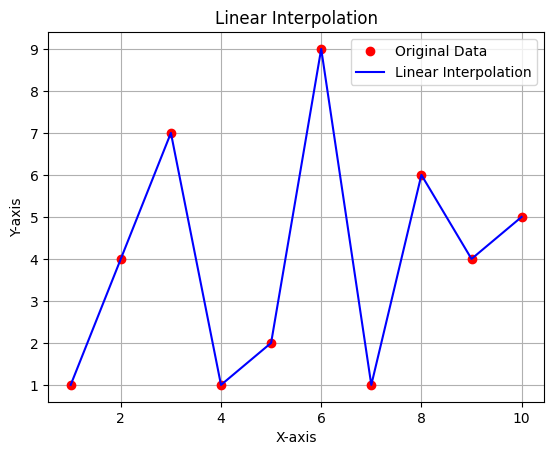

In [2]:
import matplotlib.pyplot as plot
import numpy as np
from scipy.interpolate import interp1d as interp

x = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ]
y = [ 1, 4, 7, 1, 2, 9, 1, 6, 4, 5 ]

x_full = np.linspace(min(x), max(x), 1000)
linearInterp = interp(x, y, kind="linear")
y_linear_full = linearInterp(x_full)

plot.plot(x, y, marker='o', linestyle='None', color='r', label='Original Data')
plot.plot(x_full, y_linear_full, marker='None', linestyle='-', color='b', label='Linear Interpolation')
plot.title("Linear Interpolation")
plot.xlabel("X-axis")
plot.ylabel("Y-axis")
plot.legend()
plot.grid()
plot.show()


Cubic Interpolation is the practice of assuming a cubic function exists connecting two points, (x1, y1) and (x2, y2). However, notice something. A linear function has the form ax + b, and so there are only two unknowns. A cubic function has the form ax^3 + bx^2 + cx + d and has four unknowns.

A linear equation needs only two pieces of information to be generated, but a cubic equation needs four. So where does this information come from? In a linear situation the two pieces of information are the two end points. The value of f at x1 and x2.

So then the cubic spline needs two more pieces, per segment. One way to help this is to provide a value for the first derivative at each point, but in many situations we don't want to assume we know what this is. So instead, we say that the difference of the derivatives from both connecting lines must be zero. This enforces not only normal continuity, but continuity for the first and second derivatives. Resulting of course in a much more smooth and natural line.

However, this is still lacking two pieces of information, as we can only do this once for every juction of two splines. The solution is typically to force the first derivative to point towards the second point, and to force the derivative of the last point to point in the opposite direction of the second-to-last point.

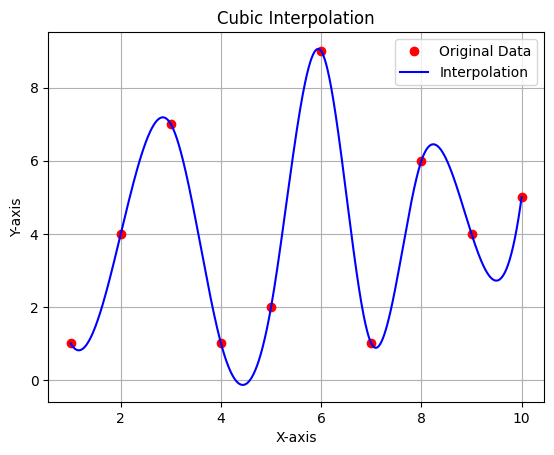

In [3]:
import matplotlib.pyplot as plot
import numpy as np
from scipy.interpolate import interp1d as interp

x = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ]
y = [ 1, 4, 7, 1, 2, 9, 1, 6, 4, 5 ]

x_full = np.linspace(min(x), max(x), 1000)
linearInterp = interp(x, y, kind="cubic")
y_linear_full = linearInterp(x_full)

plot.plot(x, y, marker='o', linestyle='None', color='r', label='Original Data')
plot.plot(x_full, y_linear_full, marker='None', linestyle='-', color='b', label='Interpolation')
plot.title("Cubic Interpolation")
plot.xlabel("X-axis")
plot.ylabel("Y-axis")
plot.legend()
plot.grid()
plot.show()
